Chapter 10

# 可视化线性相关系数
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过不同的可视化方式来展示二维正态分布的联合分布，分析 $X$ 和 $Y$ 之间的负相关性。

1. **设置参数**：设定均值 $\mu_X=0$ 和 $\mu_Y=0$，标准差 $\sigma_X=1$ 和 $\sigma_Y=1$，以及负相关系数 $\rho=-0.9$。使用这些参数构建协方差矩阵：
   $$
   \Sigma = \begin{bmatrix} \sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix} = \begin{bmatrix} 1 & -0.9 \\ -0.9 & 1 \end{bmatrix}
   $$

2. **生成二维正态分布数据**：利用多元正态分布生成 500 个 $(X, Y)$ 数据点，这些数据点围绕着中心 $(\mu_X, \mu_Y)$。

3. **数据分布的可视化**：
   - 在第一个平面图上，展示生成的 $(X, Y)$ 数据点并绘制中心位置的虚线，以表明数据的对称性。
   - 在三维图上，绘制联合概率密度函数 (PDF) 的网格图和等高线图，显示 $(X, Y)$ 分布的概率密度。

4. **二维等高线图**：使用等高线图显示 $X$ 和 $Y$ 之间的联合 PDF，此图进一步展示了高概率区域的形状，该形状围绕 $X$ 和 $Y$ 的均值 $(0, 0)$。

5. **矢量表示和角度分析**：
   - 通过绘制向量 $[1, 0]$ 和 $[\cos(\theta), \sin(\theta)]$ 来展示 $X$ 和 $Y$ 的主要方位角 $\theta$，其中 $\theta$ 由相关系数 $\rho$ 表达为 $\theta = \arccos(\rho)$。此角度体现了 $X$ 和 $Y$ 的负相关性。
   - 绘制单位圆来辅助展示向量的相对方向，并用负相关 $\rho=-0.9$ 显示 $Y$ 倾向于 $X$ 的反方向。

最终的可视化展示了 $X$ 和 $Y$ 的负相关如何影响分布的形状及方向。负相关导致数据沿着一个对角方向聚集，形成一个沿着反方向延伸的椭圆形分布。

这段代码模拟了二维正态分布的数据并绘制其概率密度函数 (PDF)。首先通过相关系数 $\rho$ 和协方差矩阵生成二维正态分布的散点图。随后绘制了该分布的三维和二维等高线图，并展示了与相关性角度 $\theta$ 相关的向量关系，生成了表示数据结构的二维空间的向量图。

### 协方差矩阵
协方差矩阵表示为：
$$
\Sigma = \begin{bmatrix} \sigma_X^2 & \sigma_X \sigma_Y \rho \\ \sigma_X \sigma_Y \rho & \sigma_Y^2 \end{bmatrix}
$$

### 角度 $\theta$
角度 $\theta$ 与相关系数 $\rho$ 的关系为：
$$
\theta = \arccos(\rho)
$$

In [1]:
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as multi_norm
import numpy as np
from matplotlib.patches import Rectangle

## 准备数据

In [2]:
np.random.seed(2)  # 设置随机种子

rho = -0.9  # 设置相关系数

mu_X = 0  # 设置 X 的均值
mu_Y = 0  # 设置 Y 的均值

MU = [mu_X, mu_Y]  # 定义均值向量

sigma_X = 1  # 设置 X 的标准差
sigma_Y = 1  # 设置 Y 的标准差

## 协方差矩阵

In [3]:
SIGMA = [[sigma_X**2, sigma_X*sigma_Y*rho], 
         [sigma_X*sigma_Y*rho, sigma_Y**2]]  # 定义协方差矩阵

num = 500  # 样本数

X, Y = multi_norm(MU, SIGMA, num).T  # 生成二维正态分布数据

center_X = np.mean(X)  # 计算 X 的均值
center_Y = np.mean(Y)  # 计算 Y 的均值

## 绘制散点图

[]

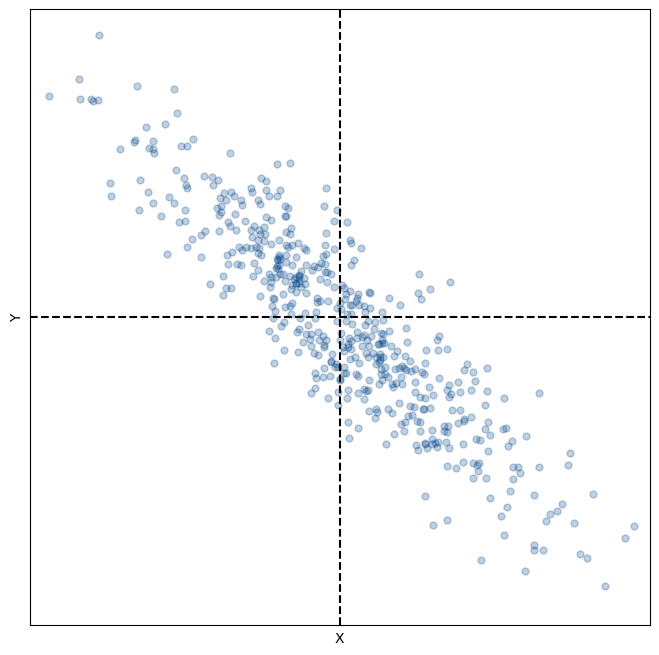

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))  # 创建图形和坐标轴

plt.plot(X, Y, '.', color = '#00448A', 
         alpha = 0.25, markersize = 10)  # 绘制散点

ax.axvline(x = 0, color = 'k', linestyle = '--')  # 绘制垂直参考线
ax.axhline(y = 0, color = 'k', linestyle = '--')  # 绘制水平参考线

ax.set_xlabel('X')  # 设置 X 轴标签
ax.set_ylabel('Y')  # 设置 Y 轴标签
ax.set_xlim((-3, 3))  # 设置 X 轴范围
ax.set_ylim((-3, 3))  # 设置 Y 轴范围
ax.xaxis.set_ticks([])  # 隐藏 X 轴刻度
ax.yaxis.set_ticks([])  # 隐藏 Y 轴刻度

In [5]:
from scipy.stats import multivariate_normal

X_grid = np.linspace(-3, 3, 200)  # 创建 X 网格
Y_grid = np.linspace(-3, 3, 200)  # 创建 Y 网格

In [6]:
XX, YY = np.meshgrid(X_grid, Y_grid)  # 创建网格数据

XXYY = np.dstack((XX, YY))  # 组合 X 和 Y 的网格
bi_norm = multivariate_normal(MU, SIGMA)  # 创建二维正态分布对象

## 计算概率密度

In [7]:
pdf_fine = bi_norm.pdf(XXYY)  # 计算联合分布的概率密度

## 3D 可视化

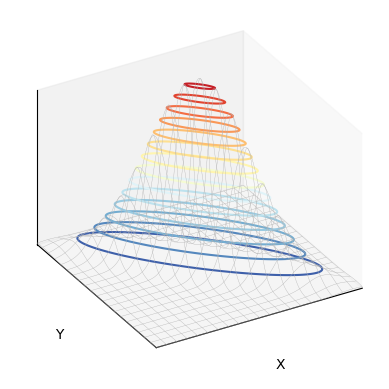

In [8]:
fig = plt.figure()  # 创建图形
ax = plt.axes(projection='3d')  # 设置3D投影

ax.plot_wireframe(XX, YY, pdf_fine,
                  cstride = 10, rstride = 10,
                  color = [0.7, 0.7, 0.7],
                  linewidth = 0.25)  # 绘制3D网格图

ax.contour3D(XX, YY, pdf_fine, 15,
             cmap = 'RdYlBu_r')  # 绘制3D等高线图

ax.set_proj_type('ortho')  # 设置正交投影
ax.view_init(azim=-120, elev=30)  # 设置视角
ax.xaxis.set_ticks([])  # 隐藏 X 轴刻度
ax.yaxis.set_ticks([])  # 隐藏 Y 轴刻度
ax.zaxis.set_ticks([])  # 隐藏 Z 轴刻度
ax.set_xlabel('X')  # 设置 X 轴标签
ax.set_ylabel('Y')  # 设置 Y 轴标签
ax.set_zlabel('PDF')  # 设置 Z 轴标签
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置 X 轴背景色
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置 Y 轴背景色
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置 Z 轴背景色
ax.set_xlim3d([-3, 3])  # 设置 X 轴范围
ax.set_ylim3d([-3, 3])  # 设置 Y 轴范围
ax.set_zlim3d([0, 0.3])  # 设置 Z 轴范围

plt.show()  # 显示图形

## 2D 等高线图

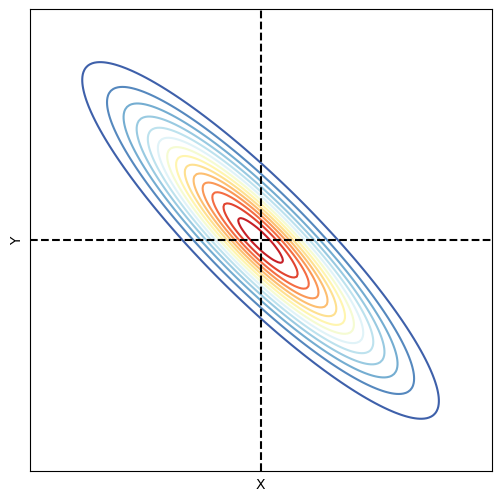

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))  # 创建图形和坐标轴

ax.contour(XX, YY, pdf_fine, 15,
           cmap = 'RdYlBu_r')  # 绘制2D等高线图
ax.axvline(x = 0, color = 'k', linestyle = '--')  # 绘制垂直参考线
ax.axhline(y = 0, color = 'k', linestyle = '--')  # 绘制水平参考线
ax.xaxis.set_ticks([])  # 隐藏 X 轴刻度
ax.yaxis.set_ticks([])  # 隐藏 Y 轴刻度
ax.set_aspect('equal')  # 设置图形比例
ax.set_xlabel('X')  # 设置 X 轴标签
ax.set_ylabel('Y')  # 设置 Y 轴标签
plt.show()  # 显示图形

## 绘制向量图函数

In [10]:
def draw_vector(vector, RBG):  # 自定义函数：绘制向量
    array = np.array([[0, 0, vector[0], vector[1]]])
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG)  # 绘制箭头向量

In [11]:
theta = np.arccos(rho)  # 计算角度 theta

## 绘制相关性向量图

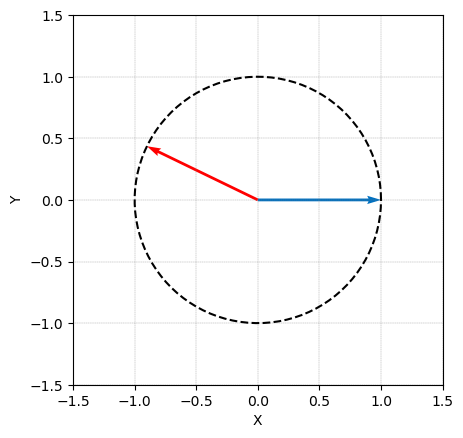

In [12]:
fig, ax = plt.subplots()  # 创建图形和坐标轴

draw_vector([1, 0], np.array([0, 112, 192])/255)  # 绘制 X 轴向量
draw_vector([np.cos(theta), np.sin(theta)], np.array([255, 0, 0])/255)  # 绘制角度向量

circle_theta = np.linspace(0, 2*np.pi, 100)  # 创建角度数据

circle_X = np.cos(circle_theta)  # 计算圆的 X 坐标
circle_Y = np.sin(circle_theta)  # 计算圆的 Y 坐标

ax.plot(circle_X, circle_Y, color = 'k', linestyle = '--')  # 绘制单位圆

ax.set_xlabel('X')  # 设置 X 轴标签
ax.set_ylabel('Y')  # 设置 Y 轴标签
plt.axis('scaled')  # 设置图形比例
ax.set_xlim([-1.5, 1.5])  # 设置 X 轴范围
ax.set_ylim([-1.5, 1.5])  # 设置 Y 轴范围
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置网格
plt.show()  # 显示图形
